In [1]:
#Importing necessary libraries

import matplotlib.pyplot as plt #for visualisation of complex data
import seaborn as sns #for visualisation of 
import numpy as np  # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression #for algo of linear regression
from sklearn.metrics import mean_squared_error,r2_score #for evaluation of prediction model
from sklearn.model_selection import train_test_split  

### Data Reading

In [2]:
data=pd.read_csv('forestfires.csv',low_memory=False)     #Reading data from csv
df=pd.DataFrame(data)                                #The dataset is loaded into a DataFrame named df.

### Data Inspection

In [3]:
#Displaying the first few rows of the dataset
print("First few values: \n")
df.head()

First few values: 



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#Displaying the information about the dataset
df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB



In [5]:
#Counting the number of null values in each column
null_Val=df.isnull().sum() 
print("No. of null values: \n",null_Val)
print()

No. of null values: 
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64



There are no null values so we don't need to drop any cols.

In [6]:
#Deciding label and features
X=df[['temp','wind','rain','RH']]
Y=df['area']

In [7]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#here, the values of test_size and random_state can be changed.We can do trial and error in order to check the data.

In [8]:
#model training
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
#predicting the values
y_pred=model.predict(x_test)

In [10]:
#evaluate
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 is: ",r2,"mse is",mse)

#we changed the values of test_size and random_state as we can see the chance for error is high (9414.25...) while the probability of the data model working fine is very less(0.0063...)

r2 is:  0.0063256704077582215 mse is 9414.259278032454


In [11]:
#taking user input
def get_user_input():
    try:
        temp=float(input("Enter temperature "))
        RH=int(input("Enter RH "))
        wind=float(input("Enter wind value "))
        rain=float(input("Enter rain value "))

        return pd.DataFrame({'temp':[temp],'wind':[wind],'rain':[rain],'RH':[RH]})
    except ValueError:
        print("Invalid Input! Enter again")
        return get_user_input()
    
new_data=get_user_input()

new_prediction=model.predict(new_data)

print("Effected area by fire can be: ",new_prediction)


Enter temperature  1
Enter RH  1
Enter wind value  1
Enter rain value  1


Effected area by fire can be:  [-11.28893982]


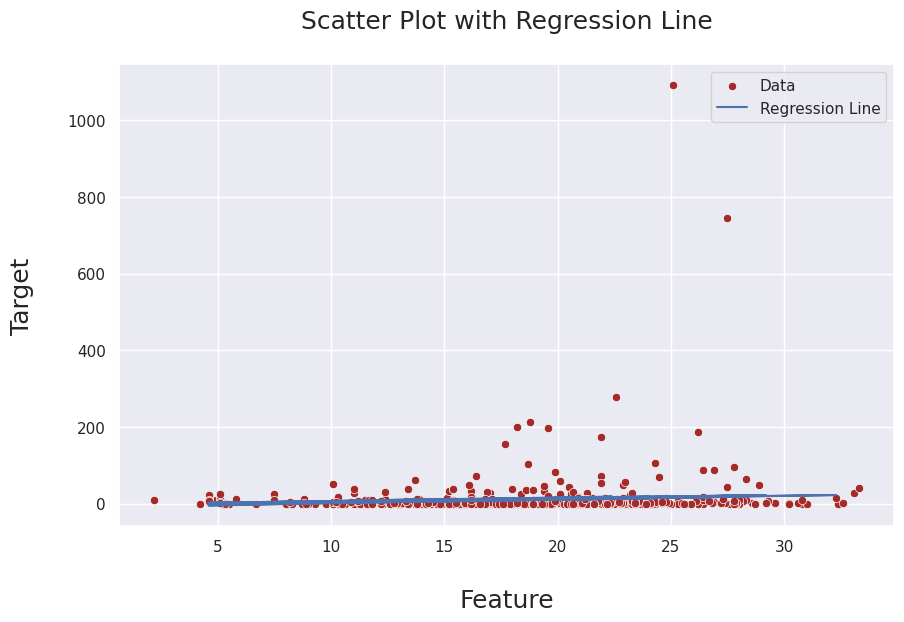

In [15]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
#plt.xticks(rotation=90)
sns.scatterplot(x='temp',y='area',color='brown',data=data,label="Data")
plt.plot(x_test['temp'],y_pred,label='Regression Line')
plt.title('Scatter Plot with Regression Line\n',fontsize=18)
plt.xlabel('\nFeature',fontsize=18)
plt.ylabel('Target\n',fontsize=18)
plt.legend()